# Part 1. Data Cleaning and Data Wrangling

In [297]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [298]:
#Create dataframe and populate it with values
url = 'https://docs.google.com/uc?export=download&id=1uv6BLarrcZ6PMJVgEFSoXHR8D16zb1Rm'
df = pd.read_csv(url)

<ipython-input-298-5e044a7339d7>:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [299]:
#Take a look at the data sample
df.sample(10)

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
119312,CHEECH,M,2014,Dachshund,10029.0,02/12/2017,02/12/2018,2017
612564,BOWIE,M,2016,Plott,11222.0,09/28/2023,09/01/2025,2023
268422,COCO,F,2009,Yorkshire Terrier,10009.0,08/28/2020,09/29/2022,2022
538923,CALLIE,F,2022,Shiba Inu,10014.0,04/19/2022,04/19/2023,2023
249122,LUCY,F,2012,Redbone Coonhound,11201.0,11/09/2018,11/21/2019,2018
26905,DOUG,M,2014,American Pit Bull Terrier/Pit Bull,10030.0,09/23/2015,09/23/2016,2016
114913,SADIE,F,2007,Unknown,10009.0,01/13/2017,12/29/2017,2017
510669,WONKA,F,2012,Unknown,10003.0,02/22/2019,03/25/2024,2023
528283,BACCHUS,M,2020,Lagotto Romagnolo,11231.0,01/09/2022,01/01/2023,2023
171853,SPIKE,M,2015,American Staffordshire Terrier,11201.0,10/08/2017,10/08/2018,2017


In [300]:
#Figure out column names, data types, dataframe shape and the aproximate amount of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722864 entries, 0 to 722863
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   AnimalName          721054 non-null  object 
 1   AnimalGender        722843 non-null  object 
 2   AnimalBirthYear     722864 non-null  object 
 3   BreedName           722864 non-null  object 
 4   ZipCode             722855 non-null  float64
 5   LicenseIssuedDate   722864 non-null  object 
 6   LicenseExpiredDate  722782 non-null  object 
 7   Extract Year        722864 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 44.1+ MB


In [301]:
#Using Regular Expressions package, standardize the column names by inserting underscore and converting everything to lower case
import re
df.columns = [re.sub(r"([a-z])([A-Z])", r"\1_\2", col).lower() for col in df.columns]

In [302]:
#Change the last column name replacing space with underscore
df.rename(columns={"extract year": "extract_year"}, inplace=True)

df.columns

Index(['animal_name', 'animal_gender', 'animal_birth_year', 'breed_name',
       'zip_code', 'license_issued_date', 'license_expired_date',
       'extract_year'],
      dtype='object')

In [303]:
#Convert the data types to more appropriate and replace missing values with 0
df['animal_birth_year'] = pd.to_numeric(df['animal_birth_year'], errors='coerce').fillna(0).astype(int)
df['zip_code'] = pd.to_numeric(df['zip_code'], errors='coerce').fillna(0).astype(int)

df["license_issued_date"] = pd.to_datetime(df["license_issued_date"])
df["license_expired_date"] = pd.to_datetime(df["license_expired_date"])

In [304]:
#Check results
df.dtypes

,0
animal_name,object
animal_gender,object
animal_birth_year,int64
breed_name,object
zip_code,int64
license_issued_date,datetime64[ns]
license_expired_date,datetime64[ns]
extract_year,int64


In [305]:
#Check for missing values
df.isnull().sum()

,0
animal_name,1810
animal_gender,21
animal_birth_year,0
breed_name,0
zip_code,0
license_issued_date,0
license_expired_date,82
extract_year,0


In [306]:
#Drop missing values
df.dropna(subset=['animal_name'], inplace=True)
df.dropna(subset=['animal_gender'], inplace=True)
df.dropna(subset=['license_expired_date'], inplace=True)
df.shape

(720952, 8)

In [307]:
#Check the relevance of birth year column. Probably, in some cases there had been mistakenly filled in the owners' birth year instead of the dogs :)
df['animal_birth_year'].unique()

array([2014, 2010, 2013, 2009, 2006, 2008, 2012, 2007, 2005, 2011, 2001,
       2004, 2003, 2000, 2002, 1991, 1992, 1993, 2015, 2016, 1994, 1995,
       1996, 1997, 2017, 1998, 1999, 2018, 2019, 2020, 2021,    0, 1973,
       1930, 1990, 2022, 1986, 1921, 1922, 1912, 2023, 1987, 1934, 1989,
       1920, 1923,   18,  317,  720,  200,   21,  201,  221,  219,  202,
        209,  203,   22,  519, 2024, 1968,  223,  222, 1970,   19,    1,
        208,  204,   17, 1022])

In [308]:
#Drop values that might be erroneous. Barely there are dogs that live more than 30 years
birth_years_to_drop = df[df['animal_birth_year'] < 1996].index
df = df.drop(index=birth_years_to_drop)

In [309]:
#Look at unique zip codes
df['zip_code'].unique()

array([10035, 10465, 10013, 10028, 10025, 11215, 11201, 10022, 10003,
       11220, 10040, 10463, 11238, 10002, 10308, 10011, 11209, 11208,
       11218, 11232, 10312, 10023, 11231, 10461, 11224, 10471, 11236,
       11229, 11361, 10021, 10309, 10024, 10038, 10467, 33185, 10012,
       10473, 11104, 10034, 11379, 10029, 10451, 11374, 11106, 10016,
       11435, 10065, 10280, 10031, 10128, 10475, 11230, 10460, 11101,
       11211, 11375, 11228, 10036, 10462, 10458, 10019, 10454, 11373,
       11217, 11237, 11214, 11385, 11102, 10027, 10301, 11222, 11364,
       11234, 11205, 11377, 10314, 10014, 11206, 10026, 10032, 11365,
       11694, 11221, 11372, 10469, 11358, 11414, 10009, 10033, 10306,
       11429, 11378, 11105, 10456, 11249, 11426, 11225, 10282, 10459,
       10075, 11416, 11216, 11355, 10304, 11235, 10001, 10007, 10039,
       11415, 10017, 10452, 11204, 11434, 11418, 10470, 10037, 11233,
       11368, 11219, 11354, 11223, 11207, 11239, 10303, 11226, 11691,
       11423, 11419,

In [310]:
#Create a new column named 'borough' and load with relevant values from borough_mapping dictionary. Irrelevant zip codes fill with "Outside NYC"
borough_mapping = {
    **{zip_code: 'Manhattan' for zip_code in range(10001, 10283)},
    **{zip_code: 'Brooklyn' for zip_code in range(11201, 11257)},
    **{zip_code: 'Queens' for zip_code in list(range(11004, 11110)) + list(range(11351, 11698))},
    **{zip_code: 'Bronx' for zip_code in range(10451, 10476)},
    **{zip_code: 'Staten Island' for zip_code in range(10301, 10315)}
}

df['borough'] = df['zip_code'].astype(int).map(borough_mapping)

df['borough'] = df['borough'].fillna('Outside NYC')

In [311]:
#Filter the rows that refer to areas outside of New York City and count them
df[df['borough'] == 'Outside NYC']

,animal_name,animal_gender,animal_birth_year,breed_name,zip_code,license_issued_date,license_expired_date,extract_year,borough
50,MIA,F,2013,Rottweiler,33185,2014-09-15,2017-09-15,2016,Outside NYC
606,ARBY,M,2009,Italian Greyhound,7030,2014-11-01,2016-09-08,2016,Outside NYC
947,MOMO,F,2009,Beagle,28677,2014-12-11,2016-12-14,2016,Outside NYC
2230,TIGER,M,2011,American Staffordshire Terrier,11001,2015-01-13,2016-01-13,2016,Outside NYC
2231,UNKNOWN,F,2014,Dachshund,12051,2015-01-13,2016-01-13,2016,Outside NYC
...,...,...,...,...,...,...,...,...,...
722197,RALLY,M,2020,Australian Shepherd,10605,2024-12-25,2026-03-02,2024,Outside NYC
722325,PRALINE,F,2022,Treeing Tennessee Brindle,10708,2024-12-26,2025-12-26,2024,Outside NYC
722327,CIDER,F,2024,"Dachshund, Long Haired Miniature",13441,2024-12-26,2025-12-26,2024,Outside NYC
722374,SHILOH,F,2022,French Bulldog,7921,2024-12-27,2026-01-06,2024,Outside NYC


In [312]:
#Remove values not related to New York City
rows_to_drop = df[df['borough'] == 'Outside NYC'].index
df = df.drop(index=rows_to_drop)

df.shape

(718256, 9)

# Part 2. Research

## Breed

In [313]:
#Count the most popular breeds across all boroughs
top_breeds_across_all = df['breed_name'].value_counts()
top_breeds_across_all.head(12)

,count
breed_name,
Unknown,63412
Yorkshire Terrier,39758
Shih Tzu,36850
Chihuahua,27954
Labrador Retriever,21781
Maltese,20716
Labrador Retriever Crossbreed,19292
American Pit Bull Mix / Pit Bull Mix,17213
Shih Tzu Crossbreed,14359


In [314]:
#Drop rows with unknown breeds
more_to_drop = df[df['breed_name'] == 'Unknown'].index
df = df.drop(index=more_to_drop)

df.shape

(654844, 9)

In [315]:
#Count the top 5 popular breeds in each borough
df.groupby('borough')['breed_name'].value_counts().groupby(level=0).head(5)

borough        breed_name                          
Bronx          Yorkshire Terrier                        6710
               Shih Tzu                                 5712
               Chihuahua                                3675
               American Pit Bull Mix / Pit Bull Mix     2845
               American Pit Bull Terrier/Pit Bull       2760
Brooklyn       Yorkshire Terrier                       10607
               Shih Tzu                                10316
               Chihuahua                                7474
               Labrador Retriever Crossbreed            6308
               American Pit Bull Mix / Pit Bull Mix     5798
Manhattan      Yorkshire Terrier                        9410
               Chihuahua                                9395
               Shih Tzu                                 8389
               Labrador Retriever                       8320
               Labrador Retriever Crossbreed            6660
Queens         Yorkshire Terrier                        9140
               Shih Tzu                                 8383
               Chihuahua                                5662
               Maltese                                  5653
               Labrador Retriever                       3725
Staten Island  Shih Tzu                                 4050
               Yorkshire Terrier                        3891
               Labrador Retriever                       2713
               Maltese                                  2065
               Chihuahua                                1748
Name: count, dtype: int64

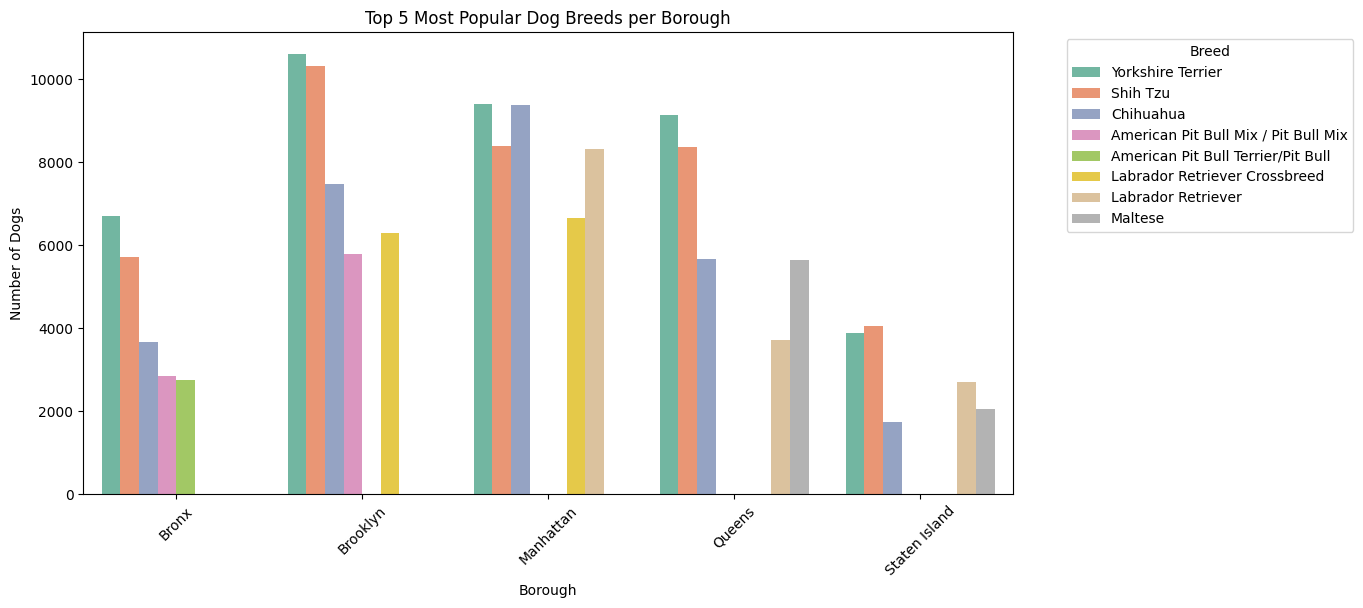

In [316]:
#Visualize top breeds. First restructure to a proper dataframe
top_breeds_df = df.groupby('borough')['breed_name'].value_counts().groupby(level=0).head(5).reset_index(name="count")

#Set figure size
plt.figure(figsize=(12, 6))

#Create a barplot
sns.barplot(data=top_breeds_df, x='borough', y='count', hue='breed_name', palette='Set2')

#Improve readability
plt.xlabel('Borough')
plt.ylabel('Number of Dogs')
plt.title('Top 5 Most Popular Dog Breeds per Borough')
plt.legend(title='Breed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

#Display the plot
plt.show()

## Gender

In [317]:
#Compute the occurences of male and female dogs
gender = df['animal_gender'].value_counts()
print(gender)

animal_gender
M    358141
F    296703
Name: count, dtype: int64


<Axes: >

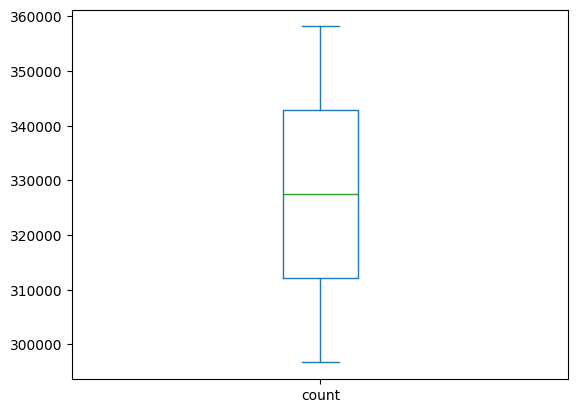

In [318]:
#Visualize the gender representation
gender.plot(kind='box')

In [319]:
#Compute the gender proportion
gender_proportion = df['animal_gender'].value_counts(normalize=True).round(2)
print(gender_proportion)

animal_gender
M    0.55
F    0.45
Name: proportion, dtype: float64


## Top Names

In [320]:
#Find out the most common dog names across all boroughs
top_names = df['animal_name'].value_counts().head(12)
print(top_names)

animal_name
UNKNOWN              17717
NAME NOT PROVIDED     8671
BELLA                 7068
MAX                   5872
LUNA                  5772
CHARLIE               5287
COCO                  4965
LOLA                  4378
ROCKY                 4130
TEDDY                 3822
MILO                  3811
LUCY                  3725
Name: count, dtype: int64


In [321]:
#Drop unknown names
names_to_drop1 = df[df['animal_name'] == 'UNKNOWN'].index
df = df.drop(index=names_to_drop1)
names_to_drop2 = df[df['animal_name'] == 'NAME NOT PROVIDED'].index
df = df.drop(index=names_to_drop2)

top_names = df['animal_name'].value_counts().head(5)


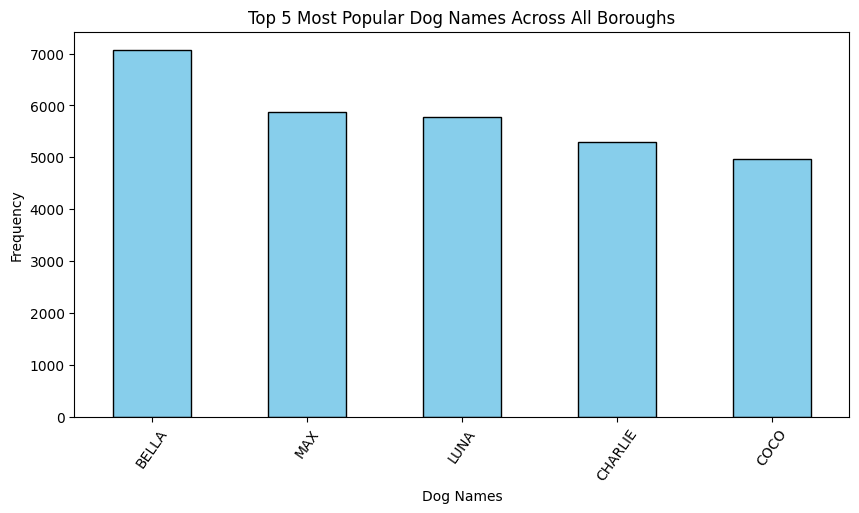

In [322]:
#Vizualize top 5 names creating a bar chart
plt.figure(figsize=(10, 5))
top_names.plot(kind='bar', color='skyblue', edgecolor='black')

#Add labels and title
plt.xlabel('Dog Names')
plt.ylabel('Frequency')
plt.title('Top 5 Most Popular Dog Names Across All Boroughs')

#Rotate x-axis labels for readability
plt.xticks(rotation=55)

#Display the chart
plt.show()

## Average Age

In [323]:
#Calculate the median dog's birth year
df['animal_birth_year'].median()

2015.0

In [324]:
# Calculate dogs' age using the current year
from datetime import datetime

current_year = datetime.now().year
df['age'] = current_year - df['animal_birth_year']

In [325]:
#Check results
df.sample(5)

,animal_name,animal_gender,animal_birth_year,breed_name,zip_code,license_issued_date,license_expired_date,extract_year,borough,age
677934,MAPLE,F,2023,Basset Hound,11215,2024-02-19,2025-02-19,2024,Brooklyn,2
77431,POLO,M,2016,Yorkshire Terrier,11103,2016-07-12,2017-07-12,2016,Queens,9
568795,MIMIC,F,2022,Boston Terrier,10455,2023-01-01,2024-01-01,2023,Bronx,3
276091,CUZO,M,2009,Yorkshire Terrier,11234,2019-06-25,2020-07-11,2022,Brooklyn,16
303677,MAX,M,2015,Terrier mix,10010,2020-05-07,2020-10-26,2022,Manhattan,10


In [326]:
#Calculate the average age
average_age = df['age'].mean()
print(f'The average age of the animals is {average_age:.2f} years.')

The average age of the animals is 10.31 years.


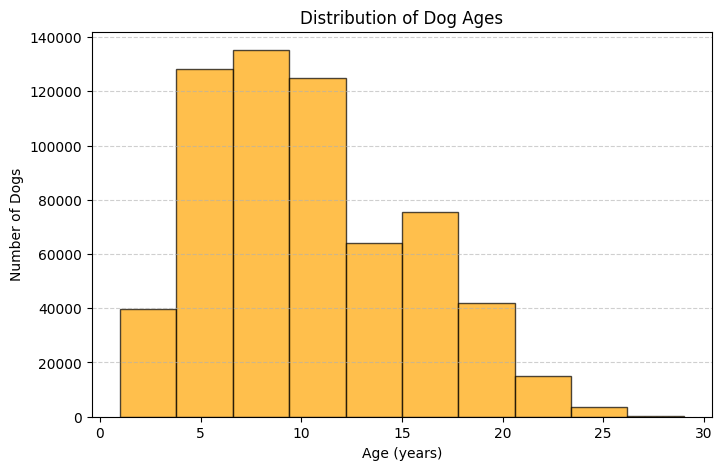

In [327]:
#Show the age distribution
plt.figure(figsize=(8, 5))
df['age'].plot(kind='hist', color='orange', edgecolor='black', alpha=0.7)
bins = range(df['age'].min(), df['age'].max() + 1)

#Add labels and title
plt.xlabel('Age (years)')
plt.ylabel('Number of Dogs')
plt.title('Distribution of Dog Ages')

#Show grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

#Display the plot
plt.show()

## Specific points of Interest

In [328]:
#Find out how many registered Corgis are there in NYC
corgi_df = df[df['breed_name'].str.contains('Corgi')]
corgi_df = corgi_df[['animal_name', 'animal_gender', 'animal_birth_year', 'breed_name', 'zip_code','borough', 'age']]
print(corgi_df)

       animal_name animal_gender  animal_birth_year             breed_name  \
233         COPPER             M               2007  Welsh Corgi, Cardigan   
311            DAX             M               2009  Welsh Corgi, Cardigan   
508          ALFIE             M               2009  Welsh Corgi, Pembroke   
1023         ANGEL             M               2006  Welsh Corgi, Cardigan   
1398           SOX             M               2006  Welsh Corgi, Pembroke   
...            ...           ...                ...                    ...   
722352       HONEY             F               2024       Corgi Crossbreed   
722362      ARCHIE             M               2020   Pembroke Welsh Corgi   
722364      SNOOPY             M               2005   Cardigan Welsh Corgi   
722575       DAISY             F               2020  Welsh Corgi, Pembroke   
722822     WHISKEY             M               2021   Pembroke Welsh Corgi   

        zip_code    borough  age  
233        10022  Manhattan 

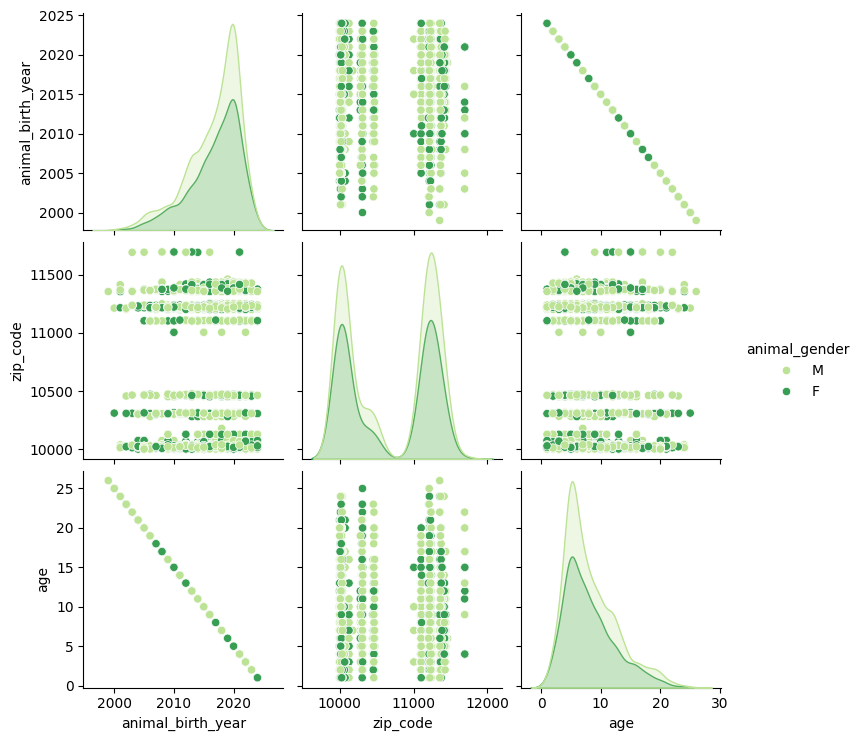

In [330]:
#Visualize differences between animal birth year, zip code and age based on gender
sns.pairplot(corgi_df, hue='animal_gender', palette='YlGn')

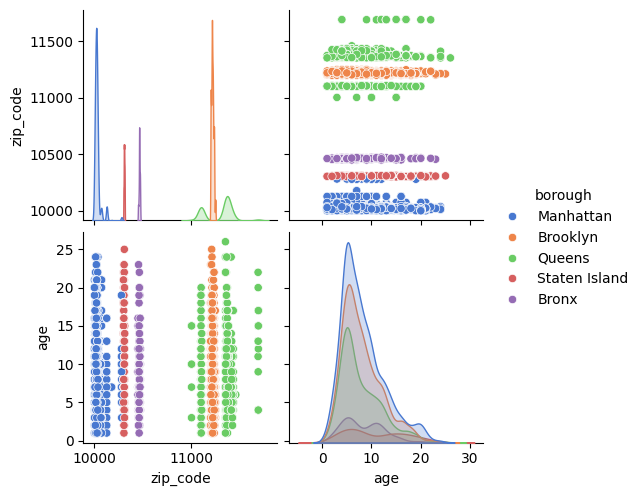

In [332]:
#Visualize distribution based on boroughs
selected_cols2 = ['borough', 'zip_code', 'age']
sns.pairplot(corgi_df[selected_cols2], hue='borough', palette='muted')

In [335]:
#Subset data about dogs named Chester that live on Staten Island
df[(df['animal_name'] == 'CHESTER') & (df['borough'] == 'Staten Island')]

,animal_name,animal_gender,animal_birth_year,breed_name,zip_code,license_issued_date,license_expired_date,extract_year,borough,age
6701,CHESTER,M,2003,Beagle,10303,2015-03-08,2016-03-08,2016,Staten Island,22
21129,CHESTER,M,2006,Labrador Retriever,10306,2015-07-27,2016-09-04,2016,Staten Island,19
21981,CHESTER,M,2007,Miniature Pinscher,10306,2015-08-03,2016-08-30,2016,Staten Island,18
25400,CHESTER,M,2015,"Schnauzer, Miniature",10304,2015-09-07,2016-09-07,2016,Staten Island,10
39944,CHESTER,M,2011,Cairn Terrier,10314,2016-01-26,2016-11-15,2016,Staten Island,14
51516,CHESTER,M,2005,Chihuahua,10314,2016-03-24,2017-04-29,2016,Staten Island,20
56839,CHESTER,M,2005,Cairn Terrier,10314,2016-04-18,2017-03-31,2016,Staten Island,20
77318,CHESTER,M,2007,Old English Sheepdog,10314,2016-07-12,2017-08-29,2016,Staten Island,18
79448,CHESTER,M,2010,Cairn Terrier,10314,2016-07-19,2017-07-19,2016,Staten Island,15
86598,CHESTER,M,2006,Shih Tzu,10314,2016-08-16,2017-10-02,2016,Staten Island,19


In [333]:
#Count how many corgis named Chester are there in Staten Island. Seems none are registered.
df[(df['animal_name'] == 'CHESTER') & (df['borough'] == 'Staten Island') & (df['breed_name'] == 'Corgi')]

,animal_name,animal_gender,animal_birth_year,breed_name,zip_code,license_issued_date,license_expired_date,extract_year,borough,age
